resource: [Geometric Transformations of Images](https://docs.opencv.org/4.x/da/d6e/tutorial_py_geometric_transformations.html)

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [38]:
path = '/Users/agerasymchuk/private_repo/cv_claude_course/cv_course/images/book.jpg'
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
width, height = image.shape[:2]


In [35]:

def plot_images(first: tuple, second: tuple, title: str):
    fig, ax = plt.subplots(1, 2)
    ax[0].set_title(first[1])
    ax[0].imshow(first[0])


    ax[1].set_title(second[1])
    ax[1].imshow(second[0])

    plt.tight_layout()
    plt.suptitle(title)
    plt.show()


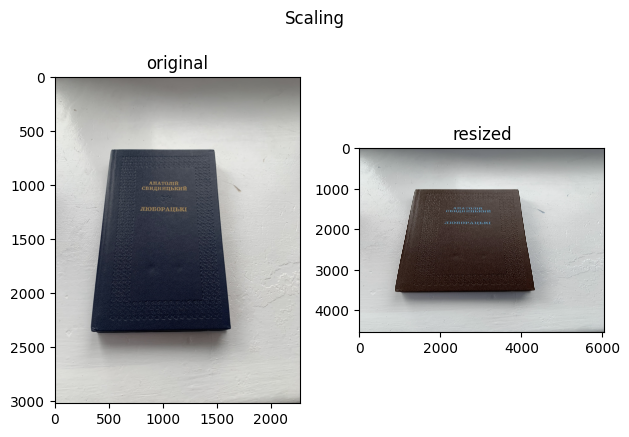

In [ ]:
#################
#     Scaling
#################
resized = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
# or
resized2 = cv2.resize(image, (width * 2, height * 2), interpolation=cv2.INTER_CUBIC)

image_fixed = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
resized2_fixed = cv2.cvtColor(resized2, cv2.COLOR_BGR2RGB)

plot_images(
    first=(image, 'original'), 
    second=(resized2_fixed, 'resized'),
    title='Scaling'
)



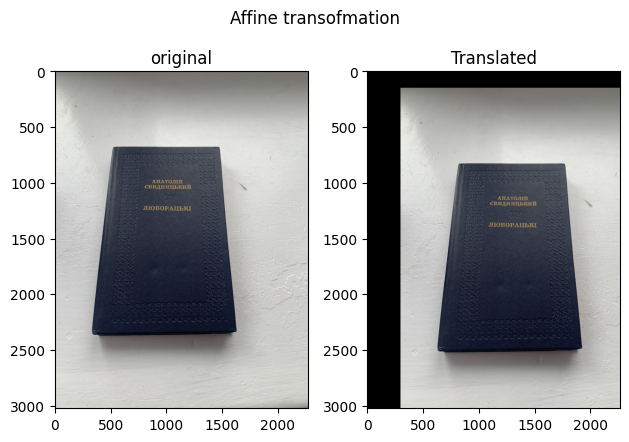

In [37]:
#################
#  Transformation
#################

"""
1. create matrix of form [[1, 0, tx], [0, 1, ty]]
2. apply matrix on image
"""

rows, cols = image.shape[:2]
matrix = np.float32([
    [1, 0, 300],
    [0, 1, 150],
])

affine_trans = cv2.warpAffine(image, matrix, (cols, rows))

plot_images(
    first=(image, 'original'), 
    second=(affine_trans, 'Translated'),
    title='Affine transofmation'
)



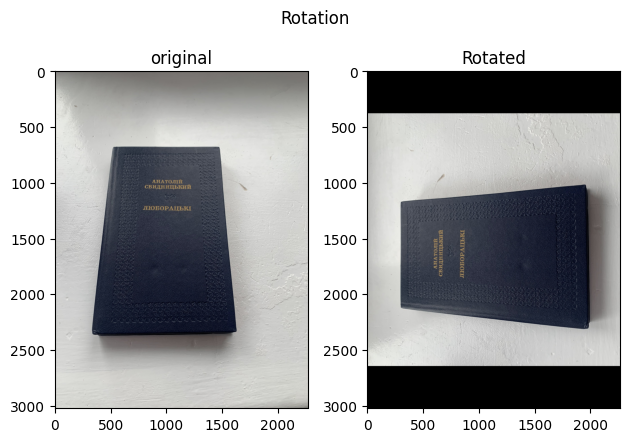

In [43]:
#################
#  Rotation
#################

rotation_matrix = cv2.getRotationMatrix2D((height/2.0, width/2.0), 90, 1)
rotated = cv2.warpAffine(image, rotation_matrix, (height, width))
plot_images(
    first=(image, 'original'), 
    second=(rotated, 'Rotated'),
    title='Rotation'
)



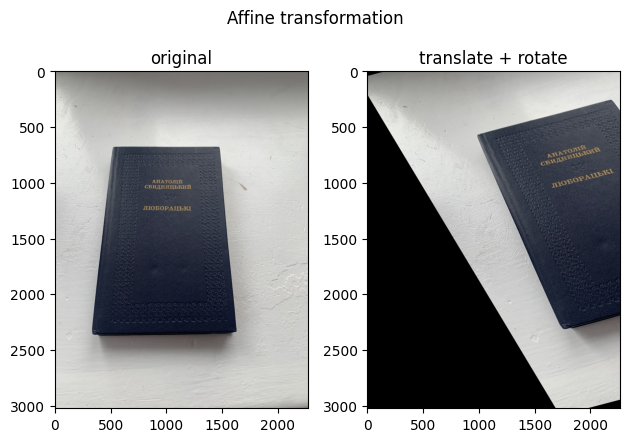

In [46]:
#################
#  Affine transformation: translate + rotate
#################
# pts1 = np.array([[600, 700], [1000, 700]])
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1, pts2)

aff_trans = cv2.warpAffine(image, M, (height, width))
plot_images(
    first=(image, 'original'), 
    second=(aff_trans, 'translate + rotate'),
    title='Affine transformation'
)


